## California Regression Activity 

### Description

Practice linear regressions

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt

#I liked the style from the assignment
plt.style.use('bmh')
%matplotlib inline

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from pandas import DataFrame

## Procedure

For this activity, you are going to make an initial guess or hypothesis about which features best represent the California dataset. You are first going to perform a regression of just a subset of the features you choose, then you are going to perform a regression with all of the features.  The steps for performing a linear regression with sciKit learn are as follows: 
 1. Load Data (Which includes separating the data into X and y)
 2.Do some initial visualizations (e.g., scatter plots or visualizations with 2 or 3 features or a feature vs. the target, maybe some histograms).
 3. Split data using train_test_split()
 4. Create lr object
 5. Train the lr model
 6. Test the lr model
 
Note: You do NOT need to do final visualizations like when we used simulated data.

Compare the results of both models and discuss why you think one performed better than the other.

### Load the California Housing Dataset

In [3]:
from sklearn.datasets import fetch_california_housing    
housing = fetch_california_housing()
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Hypothesis

What is your hypothesis?

<font color = blue>Answer: The Median Cost of Housing will, in general, be connected to the average number of rooms and occupancy; I think house age and number of bedrooms will have little impact; note, I am concerned about what qualifies bedroom vs just a room, it is possible this should be exchanged with average number of rooms, as perhaps almost all rooms are considered bedrooms, but I invision that homes with rooms that cannot be considered bedrooms (mud room, laundry room, office space) are more likely to have higher values, while maintaining a similar bedroom number as a smaller house. 
    
I believe there will be interesting outliars connected to location (latitude or longitude), where we see areas of low population that have spikes of the median home cost with low occupancy and high number of rooms; this is due to knowing there are large (relative to most places) areas of California with the ultra wealthy.
    
(An obvious trend I forgot to mention when I first wrote this was that with increasing income, the value of homes will likely increase)

In [5]:
#1 Load dataset 

#example if you want to put the target in the dataframe, be sure to separate for ML
data['MedHouseVal'] = housing.target

#if you want to remove a column, you can use the .drop
#data = data.drop('MedHouseVal', axis=1)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<font color = blue> Let's first look at the number of rooms

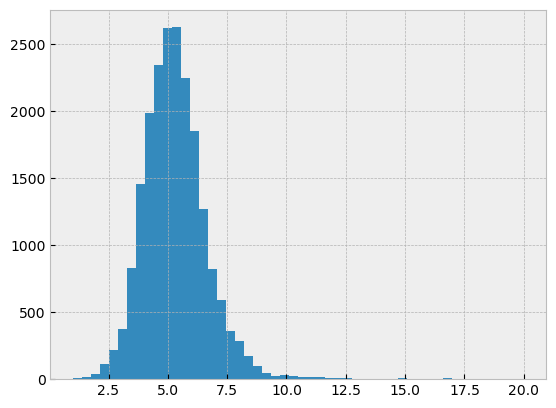

In [7]:
#Number of Rooms
#using the histogram below to visualize the data, then use the next cell to see speicfic values
#change the bins and the range to visualize the data
#plt.hist(data['AveRooms']) #commenting out the other iterations to see the train of thought
plt.hist(data['AveRooms'], bins=50, range=[1,20])
plt.show()

In [8]:
#find the max to double check the plot?
print("Max of Average Rooms")
print(data['AveRooms'].max())

#see what the counts of unique values are in this Series object
print("Average Number of Rooms: Count")
#data['AveRooms'].value_counts().head()
data['AveRooms'].value_counts()
# data.sort_values(by='AveRooms', ascending=False).head(20)

Max of Average Rooms
141.9090909090909
Average Number of Rooms: Count


5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: AveRooms, Length: 19392, dtype: int64

In [9]:
roomSubset = data[data['AveRooms'] > 10]
roomSubset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,4.175384,18.203540,19.329241,3.852075,590.685841,2.609121,36.760531,-119.072345,1.865744
std,2.505434,9.802185,15.117295,3.375181,613.668867,1.054432,2.433460,2.008064,1.176683
min,0.499900,1.000000,10.005874,1.092664,9.000000,0.692308,32.680000,-123.490000,0.149990
25%,2.739550,12.000000,11.214255,2.180435,189.500000,2.182121,34.240000,-120.267500,1.148500
50%,3.614600,17.000000,14.723584,2.866894,384.000000,2.486068,37.505000,-119.605000,1.494500
75%,4.811575,23.000000,21.573043,4.525007,780.000000,2.750631,39.055000,-117.162500,2.186750
max,15.000100,52.000000,141.909091,34.066667,4176.000000,14.000000,41.500000,-114.310000,5.000010


<font color= blue> From the above I learned that there are some major outliers. Most houses are **<10** rooms, with the median around **5**. There are **226** houses with **>10** rooms, and **69** houses with **>20** rooms... seems like we can get rid of some of that, likely group homes or condo complexes. I am very curious about the 10-20 home range in terms of learning more about potentially more "opulent" homes. But, if we are looking to understand more about the average, then we should get rid of probably everything over 10 rooms.
    
Next let's look at occupants

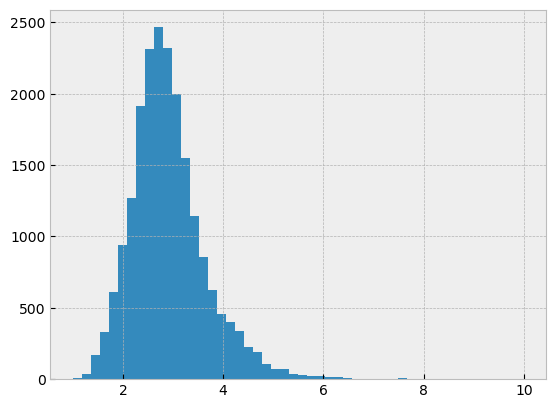

In [10]:
#Occupants
#using the histogram below to visualize the data, then use the next cell to see speicfic values
#change the bins and the range to visualize the data
# plt.hist(data['AveOccup']) #commenting out the other iterations to see the train of thought
plt.hist(data['AveOccup'], bins=50, range=[1,10])
plt.show()

In [11]:
#find the max to double check the plot?
print("Max of Average Occupants")
print(data['AveOccup'].max())

#see what the counts of unique values are in this Series object
print("Average Number of Occupants: Count")
#data['AveOccup'].value_counts().head()
data['AveOccup'].value_counts()
# data.sort_values(by='AveOccup', ascending=False).head(20)

Max of Average Occupants
1243.3333333333333
Average Number of Occupants: Count


3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: AveOccup, Length: 18841, dtype: int64

In [12]:
occupSubset = data[data['AveOccup'] > 10]
occupSubset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3.938989,29.972973,5.688776,1.171687,2615.648649,87.786668,36.105135,-119.856757,1.816920
std,3.132148,15.146482,3.872472,0.499331,2306.519868,232.632680,2.156088,2.050462,1.304639
min,0.499900,5.000000,2.111111,0.625000,13.000000,10.153846,32.560000,-122.500000,0.425000
25%,1.912500,17.000000,3.166667,0.937500,822.000000,12.296089,34.070000,-121.290000,1.154000
50%,3.419100,29.000000,5.123810,1.074713,1722.000000,15.602941,36.510000,-120.650000,1.425000
75%,4.302900,41.000000,6.468000,1.142857,4198.000000,21.333333,37.790000,-118.170000,2.125000
max,15.000100,52.000000,24.500000,3.500000,8733.000000,1243.333333,40.410000,-115.220000,5.000010


<font color = blue>Looks like the median occupancy is around **3**. We learned there are some definite outliers, we see there are some places with an occupancy of over 1000, which seems ridiculousif we are trying to consider them single family homes. There are **10** data points over **20** occupants and **37** points over **10** occupants. There are so few data points here it seems easy to justify trimming them off. 
    
Just to be sure, we can check the house value against rooms and occupancy. We did this in the 10-exploration-notes, but I think that was valid given what was found about the homes around 500k

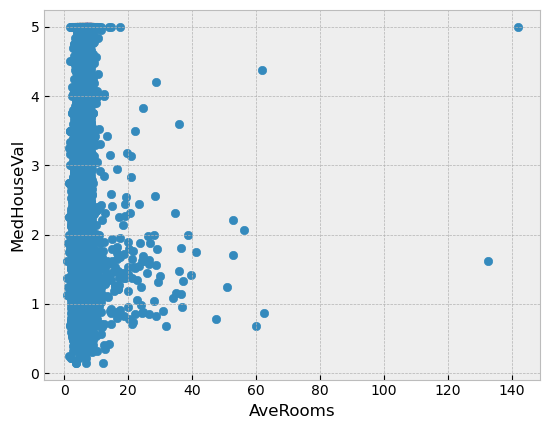

In [13]:
plt.scatter(data['AveRooms'],data['MedHouseVal']) 
plt.xlabel('AveRooms'); plt.ylabel('MedHouseVal');
plt.show()

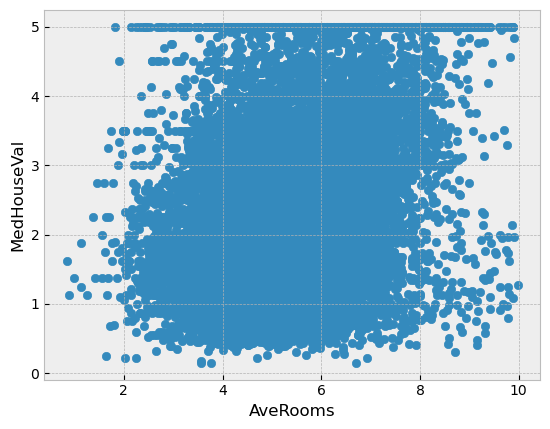

In [14]:
scatroom = data[data['AveRooms'] < 10] #looked at <100, <80, <60, <20
scatroom.describe()

plt.scatter(scatroom['AveRooms'],scatroom['MedHouseVal']) 
plt.xlabel('AveRooms'); plt.ylabel('MedHouseVal');
plt.show()

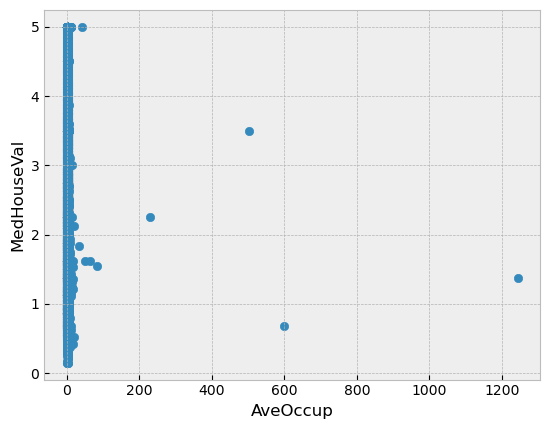

In [15]:
plt.scatter(data['AveOccup'],data['MedHouseVal']) 
plt.xlabel('AveOccup'); plt.ylabel('MedHouseVal');
plt.show()

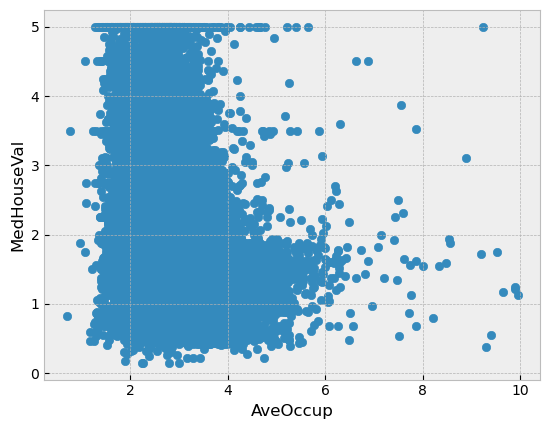

In [16]:
scatoccup = data[data['AveOccup'] < 10] #looked at <200, <40, <20
scatoccup.describe()

plt.scatter(scatoccup['AveOccup'],scatoccup['MedHouseVal']) 
plt.xlabel('AveOccup'); plt.ylabel('MedHouseVal');
plt.show()

In [17]:
# Just like the exercise we see the 500k cluser at top

#find the max to double check the plot?
print("Max of Median House Value")
print(data['MedHouseVal'].max())

#see what the counts of unique values are in this Series object
print("Median House Value: Count")
#data['MedHouseVal'].value_counts().head()
data['MedHouseVal'].value_counts()
# data.sort_values(by='MedHouseVal', ascending=False).head(20)

Max of Median House Value
5.00001
Median House Value: Count


5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: MedHouseVal, Length: 3842, dtype: int64

In [18]:
data[data['MedHouseVal'] >= 5]

#something I see this time that I didn't see in the homework... latitude and longitude


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


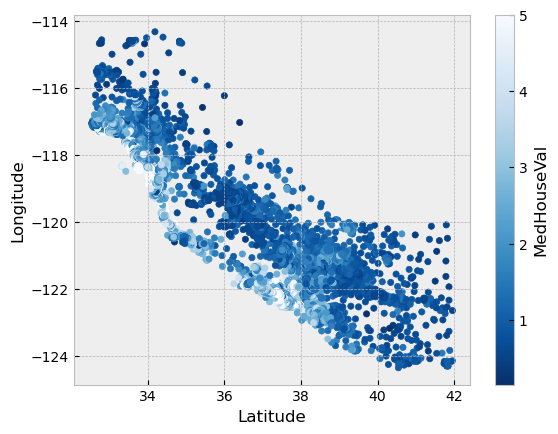

In [19]:
#I made a comment in my hypothesis about how the ultra wealth might influence some of this data
#plotting a heat map of house value vs long and lat shows us something interesting
data.plot(kind='scatter', x='Latitude', y='Longitude', c='MedHouseVal', colormap='Blues_r') 
plt.show()

#we have plotted what is roughly the shape of California, excep the top left of the map is LA and the Mexico boarder
#and towards the top of the map is the Orgeon board, so it is California flipped

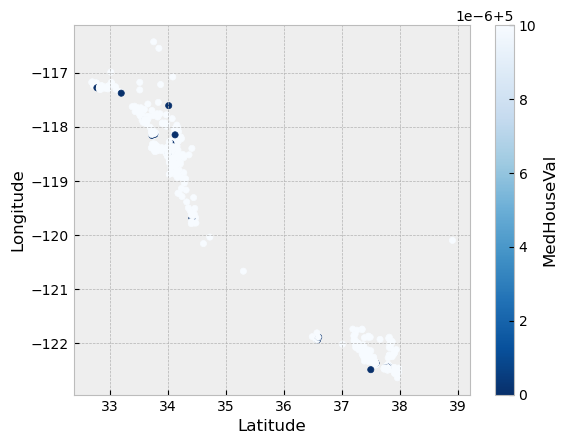

In [20]:
#what if we plot the 500k houses only
valsubset = data[data['MedHouseVal'] >= 5]
valsubset.plot(kind='scatter', x='Latitude', y='Longitude', c='MedHouseVal', colormap='Blues_r') 
plt.show()

#interesting!
#the blob at 34,-118 represents LA and the blob at 37.5, -122.5 is San Fran

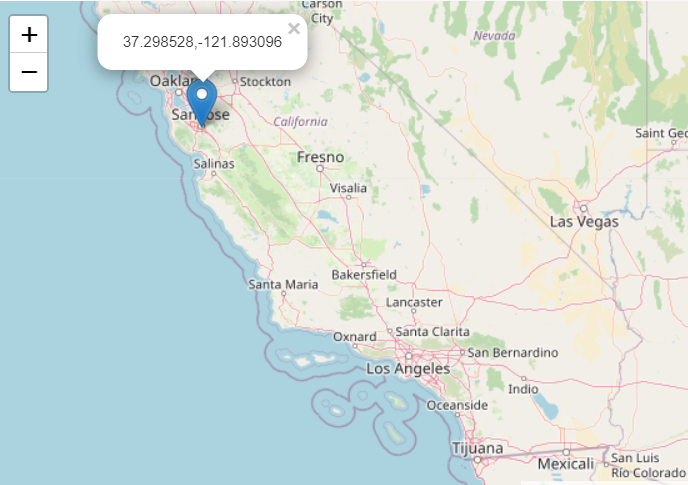

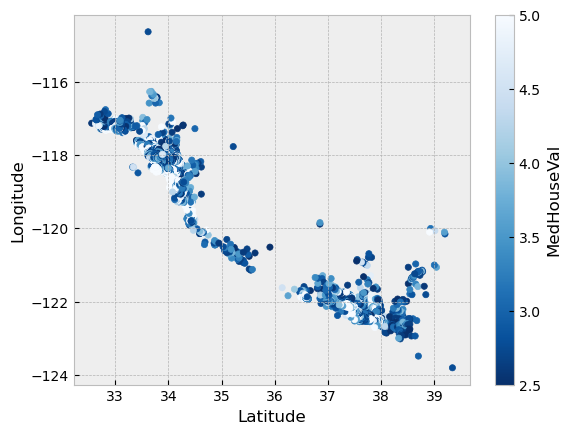

In [21]:
#what if we look at the top half of median home values?
valsubset2 = data[data['MedHouseVal'] >= 2.5]
valsubset2.plot(kind='scatter', x='Latitude', y='Longitude', c='MedHouseVal', colormap='Blues_r') 
plt.show()

#it seems like the most expensive homes are along the coast and near two major, famous cities

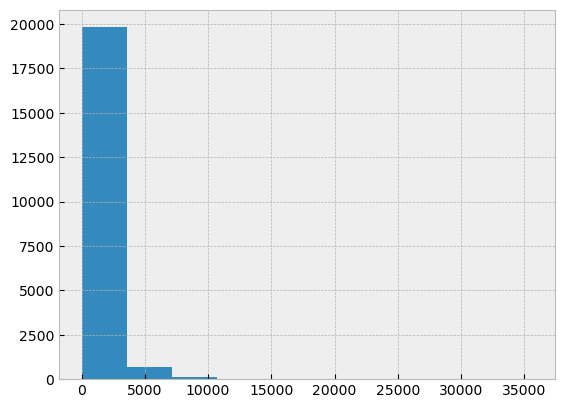

Max of Population
35682.0
Block Population: Count


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
13139,4.9516,3.0,7.338559,1.159015,16305.0,3.043113,38.43,-121.44,1.537
10309,7.4947,4.0,7.311043,1.054346,16122.0,3.106957,33.89,-117.74,3.663
6057,6.0191,8.0,6.347327,1.047525,15507.0,3.070693,34.03,-117.78,2.539
6066,6.6288,7.0,6.802554,1.026277,15037.0,3.692780,34.04,-117.87,3.397
12215,4.5841,4.0,7.006453,1.142429,13251.0,3.053929,33.52,-117.12,2.123
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78,3.992
17413,2.7377,29.0,6.276716,1.101911,12427.0,4.397381,34.70,-120.59,0.283
922,8.4045,7.0,7.635234,1.044042,12203.0,3.297217,37.53,-121.92,4.511


In [22]:
#quick population spotcheck
plt.hist(data['Population']) #looks like almost all the data is <10000
# plt.hist(data['Population'], bins=50, range=[1,20])
plt.show()

#find the max to double check the plot?
print("Max of Population")
print(data['Population'].max())

#see what the counts of unique values are in this Series object
print("Block Population: Count")
#data['Population'].value_counts().head()
# data['Population'].value_counts()
data.sort_values(by='Population', ascending=False).head(20)

In [23]:
#how many high population areas are there?
popsub = data[data['Population'] >= 6000]
popsub.describe()

#23 points >10k, not many at all
#193 >6k

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,4.444005,12.642487,5.709392,1.072823,8138.720207,13.795340,35.172487,-119.047513,2.084415
std,1.605004,8.984458,1.309300,0.078328,3142.955114,97.456477,1.963654,1.920631,0.906059
min,1.555300,2.000000,1.806122,0.833333,6000.000000,1.507302,32.650000,-122.560000,0.225000
25%,3.308600,5.000000,4.953030,1.030609,6657.000000,2.738534,33.910000,-121.380000,1.420000
50%,4.247100,11.000000,5.761173,1.054918,7282.000000,3.093957,34.190000,-118.340000,1.923000
75%,5.560100,17.000000,6.574215,1.099189,8656.000000,3.437608,37.340000,-117.420000,2.611000
max,10.226400,52.000000,9.524554,1.574288,35682.000000,1243.333333,40.550000,-116.140000,5.000010


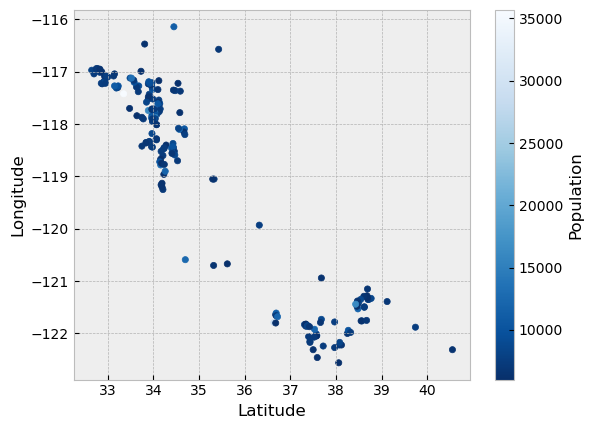

In [24]:
#where are these high pop areas?
popsubset = data[data['Population'] >= 6000] #high population areas were checked
popsubset.plot(kind='scatter', x='Latitude', y='Longitude', c='Population', colormap='Blues_r') 
plt.show()

#not unexpected, near LA and SF... can we learn anything else about population?

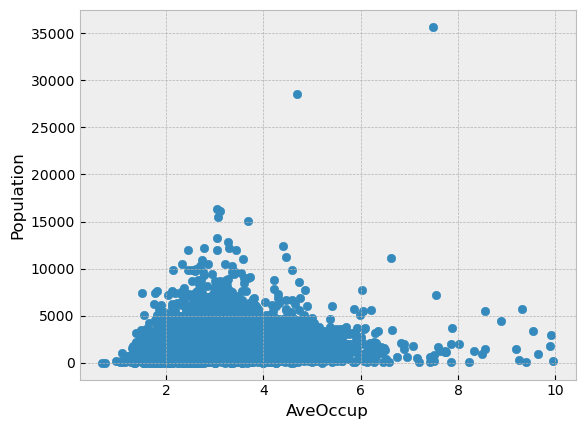

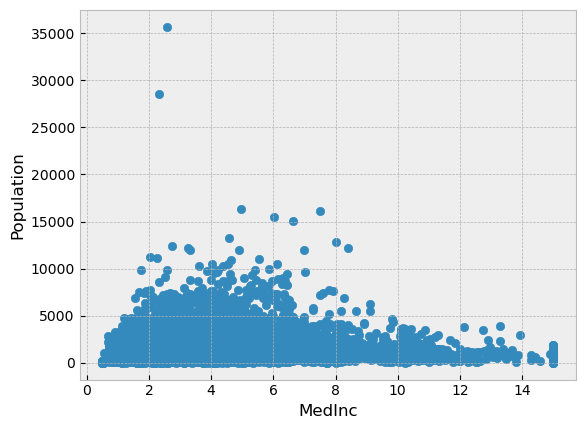

In [25]:
#does block density mean more people are living together or making less money?
plt.scatter(scatoccup['AveOccup'],scatoccup['Population']) 
plt.xlabel('AveOccup'); plt.ylabel('Population');
plt.show()

plt.scatter(scatoccup['MedInc'],scatoccup['Population']) 
plt.xlabel('MedInc'); plt.ylabel('Population');
plt.show()

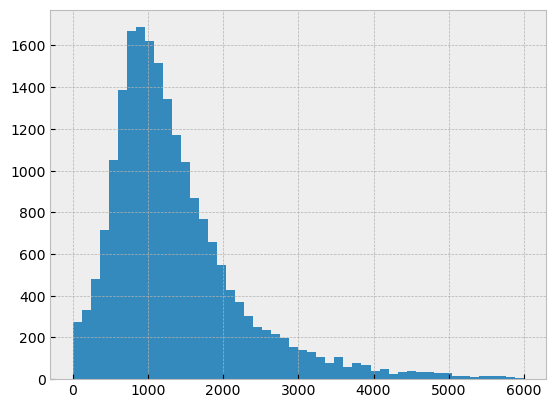

In [26]:
plt.hist(data['Population'], bins=50, range=[0,6000])
plt.show()

<font color = blue> I cannot really find any trends in the high population data, it seems safe to trim some of it off, at least anything over 10k and probably anything over 6k. 

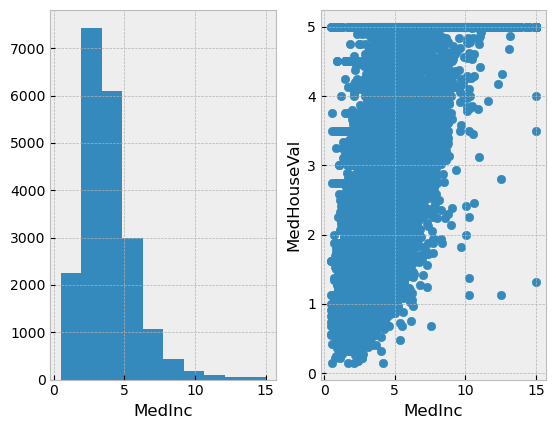

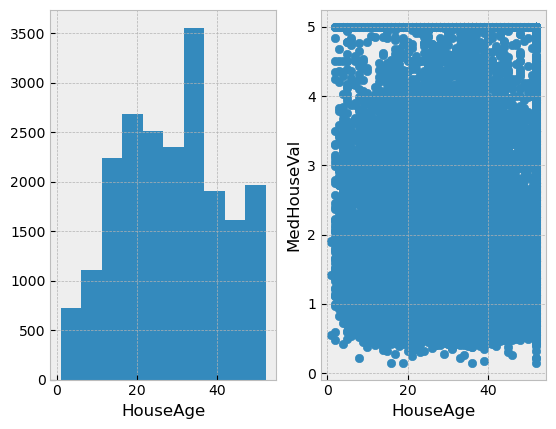

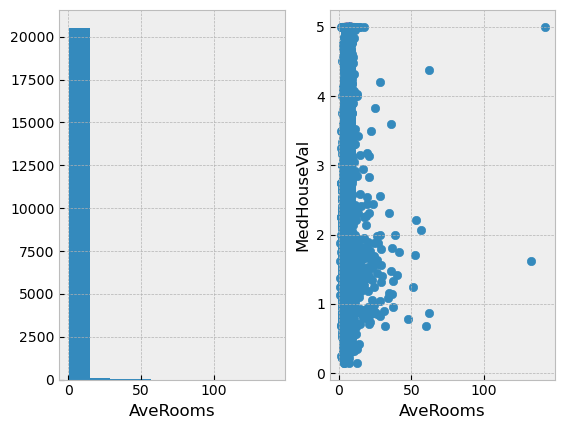

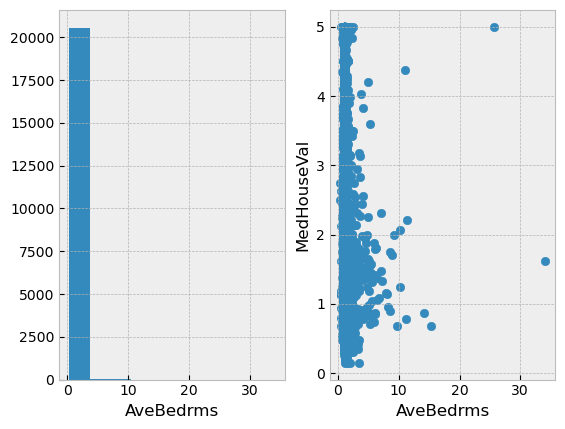

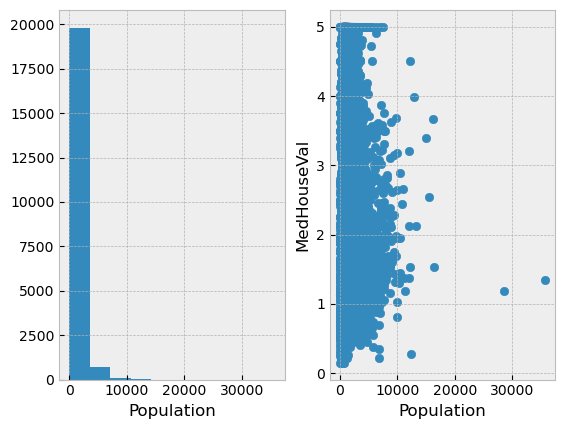

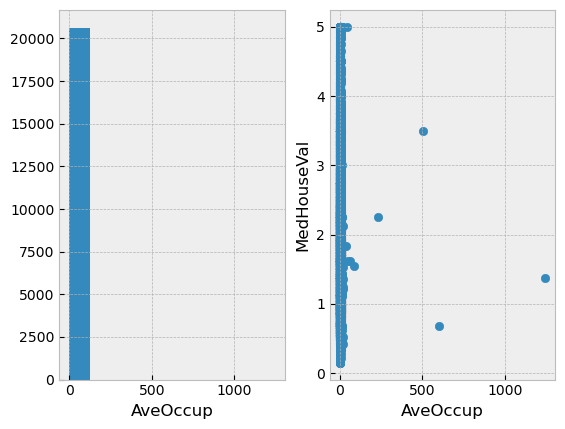

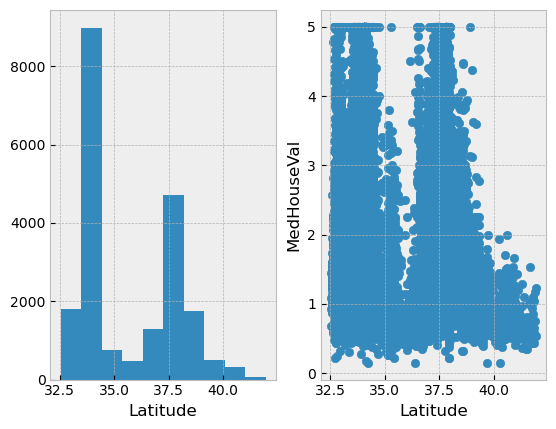

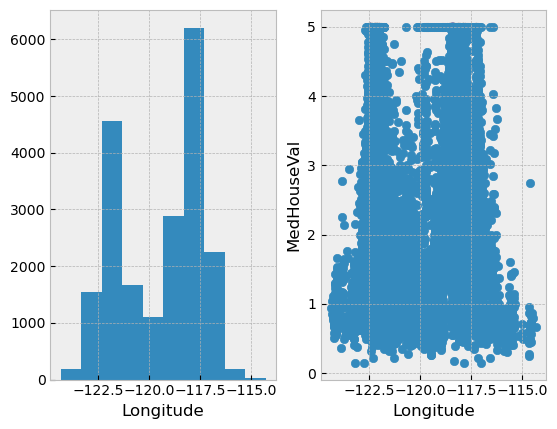

In [27]:
#by this point I have looked at a lot of data, and I think one final spot check is enough to move forward
# plots all correlations with both a histogram and a scatterplot
# we can sneak peak at the other variables and see if we need to learn more
for f in housing.feature_names:
    plt.subplot(1,2,1)
    plt.hist(data[f])
    plt.xlabel(f)
    plt.subplot(1,2,2)
    plt.scatter(data[f], data['MedHouseVal'])
    plt.xlabel(f)
    plt.ylabel('MedHouseVal')
    plt.show()

<font color = blue> From here we can see that housing age does not seem to impact value. We can see the impact of location on value in the scatter and histograms, same as we saw in the heat map. We do see the expected trend of house value increasing with income. Averge rooms and bedrooms show similar trends to home value, maybe justifying looking at rooms instead of bedrooms.
    
After everything I have looked at I think it is safe to trim off some of the outliers, similar to what was done in 10-exploration-notes. I think there are some interesting things we can learn from the outlier MedHouseVal, but I do not think they are that helpful in building our model. So, I believe creating a subset of data that trims off the >=5 MedHouseVal, >10 Occupants, >10 Rooms, >6k population. If we do that what does our data look like? 

In [28]:
#         - MedInc        median income in block group
#         - HouseAge      median house age in block group
#         - AveRooms      average number of rooms per household
#         - AveBedrms     average number of bedrooms per household
#         - Population    block group population
#         - AveOccup      average number of household members
#         - Latitude      block group latitude
#         - Longitude     block group longitude

dataTrim = data[data['MedHouseVal'] < 5] #19648 data set

#dataTrim = data[data['AveOccup'] <= 10] #20603 data set
dataTrim = dataTrim[dataTrim['AveOccup'] <= 10] #19607 when combined with above dataTrim

#dataTrim = data[data['AveRooms'] <= 10] #20414 data set
dataTrim = dataTrim[dataTrim['AveRooms'] <= 10] #19405 when combined with above dataTrim

#dataTrim = data[data['Population'] <= 6000] #20448 data set
dataTrim = dataTrim[dataTrim['Population'] <= 6000] #19220 when combined with above dataTrim

#dataTrim = data[data['AveBedrms'] <= 10] #20631 data set
dataTrim = dataTrim[dataTrim['AveBedrms'] <= 10] #no difference in the data when ran with AveRooms or dataTrim above

dataTrim.describe() #19220 data count
# data.describe() #20640 data count

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000
mean,3.668217,28.648127,5.206711,1.066028,1383.335328,2.942474,35.642364,-119.572486,1.923053
std,1.562852,12.412213,1.166829,0.129419,879.989335,0.765744,2.144153,2.004882,0.973011
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.521025,18.000000,4.404248,1.004972,801.750000,2.448155,33.930000,-121.780000,1.162000
50%,3.437500,29.000000,5.165621,1.047497,1178.000000,2.839322,34.260000,-118.500000,1.740000
75%,4.574700,37.000000,5.939280,1.096796,1726.000000,3.306995,37.720000,-118.000000,2.485000
max,15.000100,52.000000,10.000000,3.411111,6000.000000,9.954545,41.950000,-114.550000,4.991000


<font color = blue> So we are losing about 7% of the data by trimming this, the bulk of which comes from cutting off the top of the MedHouseVal. I beleive we end up at the same place as the exercise, but I feel like we have more thoroughly explored the data and justified why we are removing it. What do all those plots look like now?

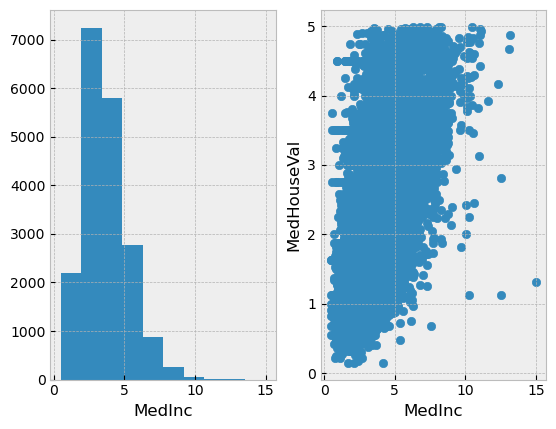

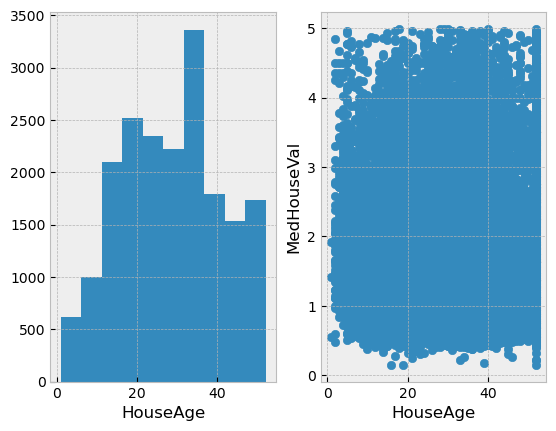

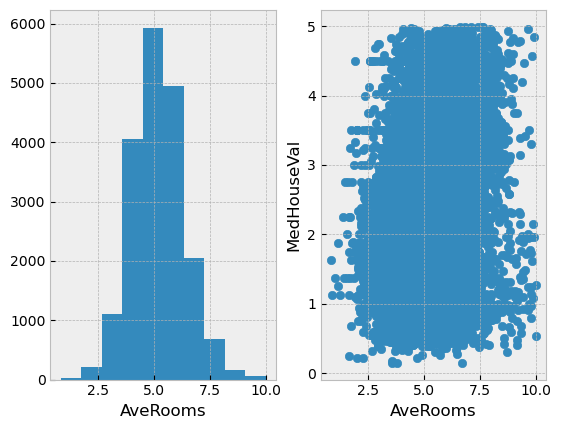

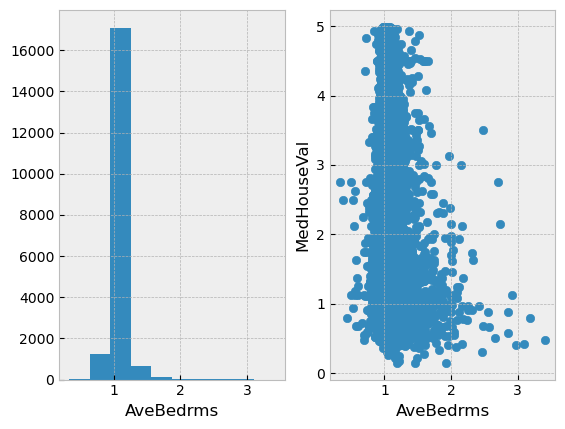

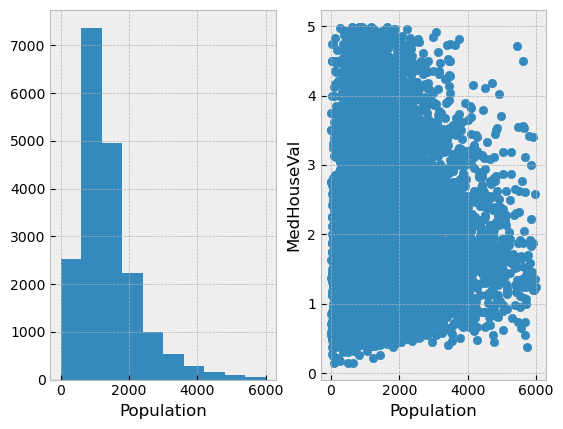

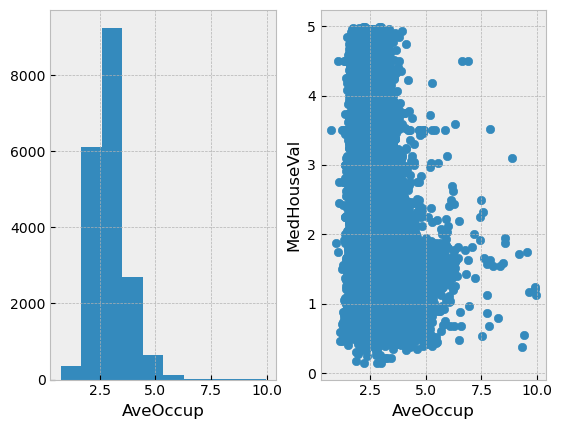

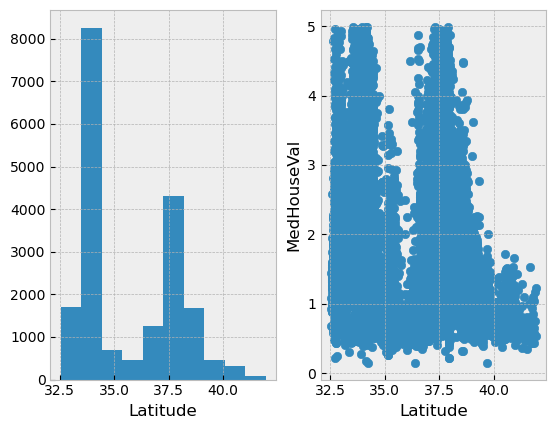

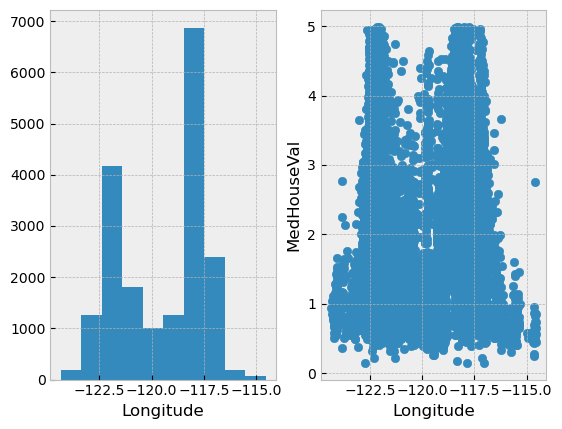

In [29]:
for f in housing.feature_names:
    plt.subplot(1,2,1)
    plt.hist(dataTrim[f])
    plt.xlabel(f)
    plt.subplot(1,2,2)
    plt.scatter(dataTrim[f], dataTrim['MedHouseVal'])
    plt.xlabel(f)
    plt.ylabel('MedHouseVal')
    plt.show()
    
    #a little cleaner

In [48]:
#Split data into testing and training 
#         - MedInc        median income in block group
#         - HouseAge      median house age in block group
#         - AveRooms      average number of rooms per household
#         - AveBedrms     average number of bedrooms per household
#         - Population    block group population
#         - AveOccup      average number of household members
#         - Latitude      block group latitude
#         - Longitude     block group longitude

#based on above we might care about the following 
X = dataTrim[['MedInc', 'AveRooms', 'AveOccup','Population','Longitude']]
#we saw that house age does not matter, Rooms = Bedrooms, and we can use Long or Lat and likely get the same info
y = dataTrim['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#test size 0.25 was chosen based on the video instructions stating this was the common practice
#random state is to make sure we can reproduce the random shuffling of data, 42 because...

In [49]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14415, 5) (4805, 5) (14415,) (4805,)


In [50]:
#at first I did this just to view the plots, but then I made the one below, becuase it looked nicer

# plt.plot(X_train['MedInc'], y_train, 'k.', label='Train Data')
# plt.plot(X_test['MedInc'], y_test, 'r.', label='Test Data')
# plt.xlabel('MedInc')
# plt.ylabel('MedHouseVal')
# plt.legend()
# plt.show()

# plt.plot(X_train['AveRooms'], y_train, 'k.', label='Train Data')
# plt.plot(X_test['AveRooms'], y_test, 'r.', label='Test Data')
# plt.xlabel('AveRooms')
# plt.ylabel('MedHouseVal')
# plt.legend()
# plt.show()

# plt.plot(X_train['AveOccup'], y_train, 'k.', label='Train Data')
# plt.plot(X_test['AveOccup'], y_test, 'r.', label='Test Data')
# plt.xlabel('AveOccup')
# plt.ylabel('MedHouseVal')
# plt.legend()
# plt.show()

# plt.plot(X_train['Population'], y_train, 'k.', label='Train Data')
# plt.plot(X_test['Population'], y_test, 'r.', label='Test Data')
# plt.xlabel('Population')
# plt.ylabel('MedHouseVal')
# plt.legend()
# plt.show()

# plt.plot(X_train['Longitude'], y_train, 'k.', label='Train Data')
# plt.plot(X_test['Longitude'], y_test, 'r.', label='Test Data')
# plt.xlabel('Longitude')
# plt.ylabel('MedHouseVal')
# plt.legend()
# plt.show()

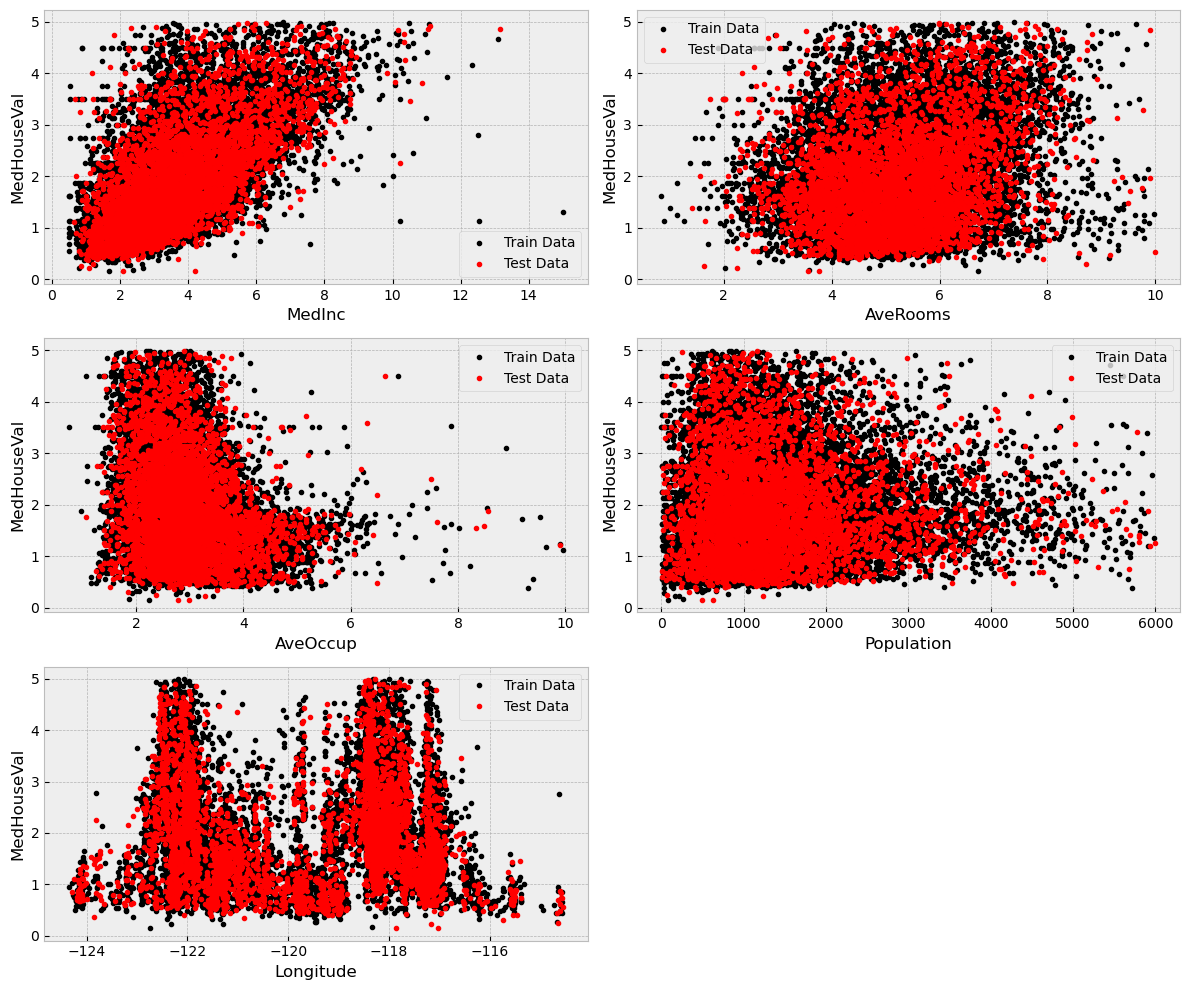

In [51]:
import matplotlib.pyplot as plt

def plot_feature(ax, X_train, X_test, y_train, y_test, feature_name):
    ax.plot(X_train[feature_name], y_train, 'k.', label='Train Data')
    ax.plot(X_test[feature_name], y_test, 'r.', label='Test Data')
    ax.set_xlabel(feature_name)
    ax.set_ylabel('MedHouseVal')
    ax.legend()

# List of features to plot
features_to_plot = ['MedInc', 'AveRooms', 'AveOccup', 'Population', 'Longitude']

# Create subplots in two columns
num_rows = len(features_to_plot) // 2 + len(features_to_plot) % 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array in case there's only one row
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_to_plot):
    if i < len(features_to_plot):
        plot_feature(axes[i], X_train, X_test, y_train, y_test, feature)

# Remove empty subplots if there are any
for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()



In [52]:
#Create lr object
lr_model = LinearRegression()

#Train model
lr_model.fit(X_train, y_train)

#Test model 
y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error
#I found this! I could use my code from the last assignment, but this is cleaner!

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.671864797354769


In [66]:
# Intercept (beta_0)
intercept = lr_model.intercept_
print("Intercept (beta_0):", intercept)

# Coefficients (beta_1, beta_2, ..., beta_n)
coefficients = lr_model.coef_
print("Coefficients (beta_1, beta_2, ..., beta_n):", coefficients)


Intercept (beta_0): 0.7401740596895872
Coefficients (beta_1, beta_2, ..., beta_n): [ 5.02927649e-01 -2.25605042e-01 -2.74056844e-01  1.42133640e-05
 -1.09018752e-02]


In [67]:
# Intercept (beta_0)
intercept = lr_model.intercept_

# Coefficients (beta_1, beta_2, ..., beta_n)
coefficients = lr_model.coef_

# Feature names
feature_names = X_train.columns

# Print the equation
equation = f"y = {intercept:.2f}"
for i in range(len(coefficients)):
    equation += f" + {coefficients[i]:.2f} * {feature_names[i]}"

print("Linear Regression Equation:")
print(equation)


Linear Regression Equation:
y = 0.74 + 0.50 * MedInc + -0.23 * AveRooms + -0.27 * AveOccup + 0.00 * Population + -0.01 * Longitude


In [80]:
# Intercept (beta_0)
intercept = lr_model.intercept_

# Coefficients (beta_1, beta_2, ..., beta_n)
coefficients = lr_model.coef_

# Feature names
feature_names = X_train.columns

# Create the equation string
equation = f"y = {intercept:.2e}"

for i in range(len(coefficients)):
    equation += f" + {coefficients[i]:.2e} * {feature_names[i]}"

print("Linear Regression Equation (Scientific Notation):")
print(equation)


Linear Regression Equation (Scientific Notation):
y = 7.40e-01 + 5.03e-01 * MedInc + -2.26e-01 * AveRooms + -2.74e-01 * AveOccup + 1.42e-05 * Population + -1.09e-02 * Longitude


### Full Dataset

In [53]:
#Split data into testing and training 

#Load dataset... so it all the data for all the features
#         - MedInc        median income in block group
#         - HouseAge      median house age in block group
#         - AveRooms      average number of rooms per household
#         - AveBedrms     average number of bedrooms per household
#         - Population    block group population
#         - AveOccup      average number of household members
#         - Latitude      block group latitude
#         - Longitude     block group longitude

#all the features!
X2 = data[['MedInc', 'HouseAge','AveRooms', 'AveBedrms','AveOccup','Population','Longitude','Latitude']]

y2 = data['MedHouseVal']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)
#test size 0.25 was chosen based on the video instructions stating this was the common practice
#random state is to make sure we can reproduce the random shuffling of data, 42 because...



In [54]:
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


In [55]:
# plt.plot(X2_train['MedInc'], y2_train, 'k.', label='Train Data')
# plt.plot(X2_test['MedInc'], y2_test, 'r.', label='Test Data')
# plt.xlabel('MedInc')
# plt.ylabel('MedHouseVal')
# plt.legend()
# plt.show()

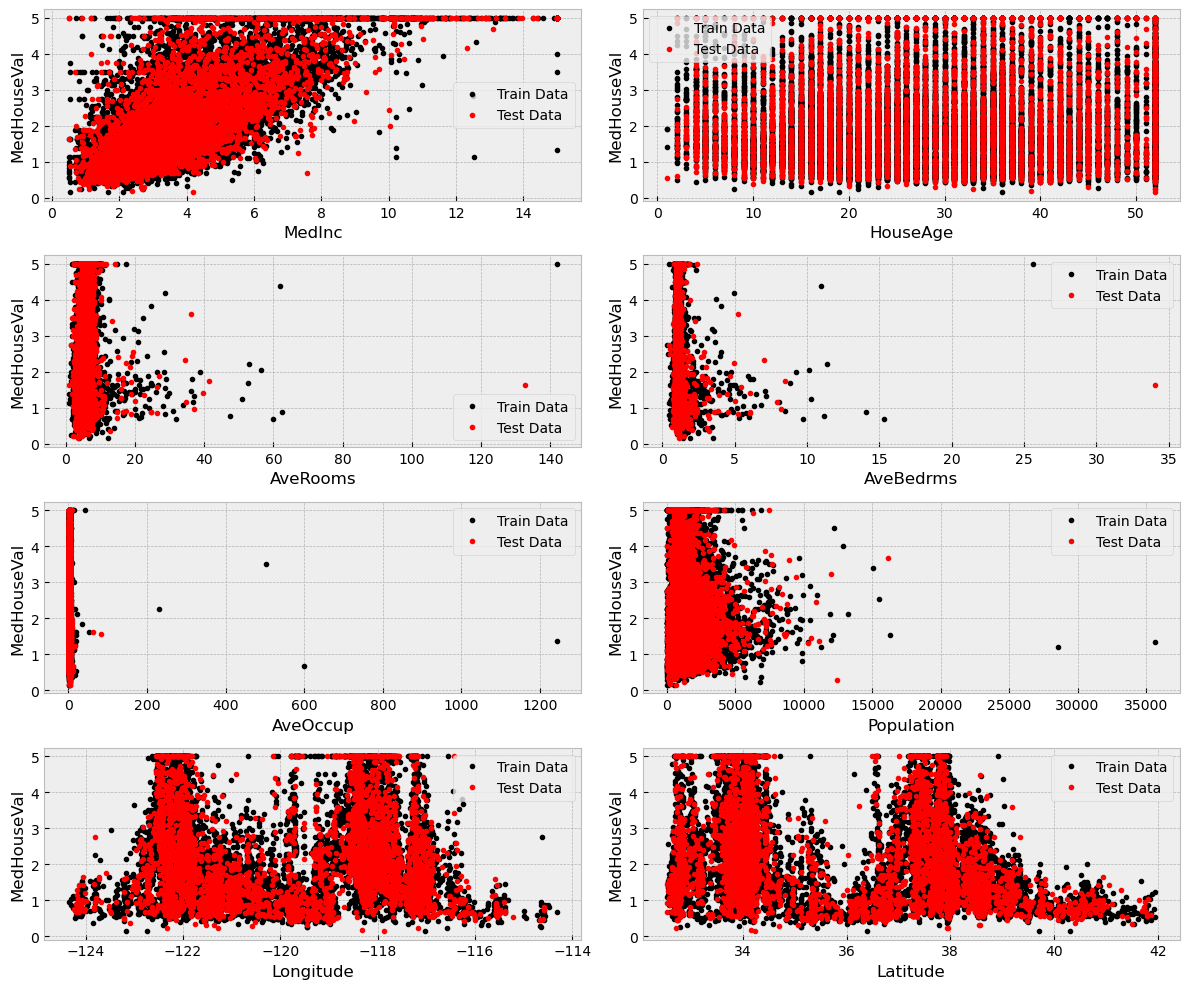

In [56]:
import matplotlib.pyplot as plt

def plot_feature(ax, X2_train, X2_test, y2_train, y2_test, feature_name):
    ax.plot(X2_train[feature_name], y2_train, 'k.', label='Train Data')
    ax.plot(X2_test[feature_name], y2_test, 'r.', label='Test Data')
    ax.set_xlabel(feature_name)
    ax.set_ylabel('MedHouseVal')
    ax.legend()

# List of features to plot
features_to_plot = ['MedInc', 'HouseAge','AveRooms', 'AveBedrms','AveOccup','Population','Longitude','Latitude']

# Create subplots in two columns
num_rows = len(features_to_plot) // 2 + len(features_to_plot) % 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array in case there's only one row
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features_to_plot):
    if i < len(features_to_plot):
        plot_feature(axes[i], X2_train, X2_test, y2_train, y2_test, feature)

# Remove empty subplots if there are any
for i in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()



In [57]:
#Create lr object
lr2_model = LinearRegression()

#Train model
lr2_model.fit(X2_train, y2_train)

#Test model 
y2_pred = lr2_model.predict(X2_test)

from sklearn.metrics import mean_squared_error
#I found this! I could use my code from the last assignment, but this is cleaner!

rmse2 = np.sqrt(mean_squared_error(y2_test, y2_pred))
print("Root Mean Squared Error:", rmse2)


Root Mean Squared Error: 0.7356145375446764


### Discussion

Which result is better, and why?

<font color = blue> Answer: The subset, trimmed data set is better, it has a lower RMSE. So, the model appears to be better at predicting the Median Home Value based on the input parameters I selected. An RMSE of 0.73 for all the data vs 0.67 from the data I selected. Now, that isn't enough by itself to say the model is for sure better. Context matters. The blue text throughout this file outlines the justification for each trimming of data. We removed outliers after a thorough investigation, we viewed the data from multiple angles, and, I beleive, made sound decisions on what we removed. All of this combined with the lower RMSE makes me beleive the trimmed model is beter.